# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [25]:
#Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [27]:
df['Cabin'] = df['Cabin'].str[0]

df[['B','F','A','G','E','C','D','T']] = pd.get_dummies(df.Cabin, dtype=int)                                                        
df[['TRAPPIST-1e','PSO J318.5-22','55 Cancri e']] = pd.get_dummies(df.Destination, dtype=int)  
df[["Earth", "Europa", "Mars"]] = pd.get_dummies(df.HomePlanet, dtype=int)

df = df.drop(columns= ['PassengerId', 'Name', 'Cabin', 'Destination', 'HomePlanet'])

In [28]:
df.dropna(inplace= True)


X= df.drop(columns= ['Transported'])
Y= df['Transported']

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.20, random_state=0)

In [29]:
normalizer= MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)

x_test_norm = normalizer.transform(x_test)

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [30]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(x_train_norm, y_train)
prediction = gb_classifier.predict(x_test_norm)

print("Gradient Boosting Classifier:")
print(classification_report(y_test, prediction))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

       False       0.83      0.76      0.79       699
        True       0.79      0.86      0.82       752

    accuracy                           0.81      1451
   macro avg       0.81      0.81      0.81      1451
weighted avg       0.81      0.81      0.81      1451



- Evaluate your model

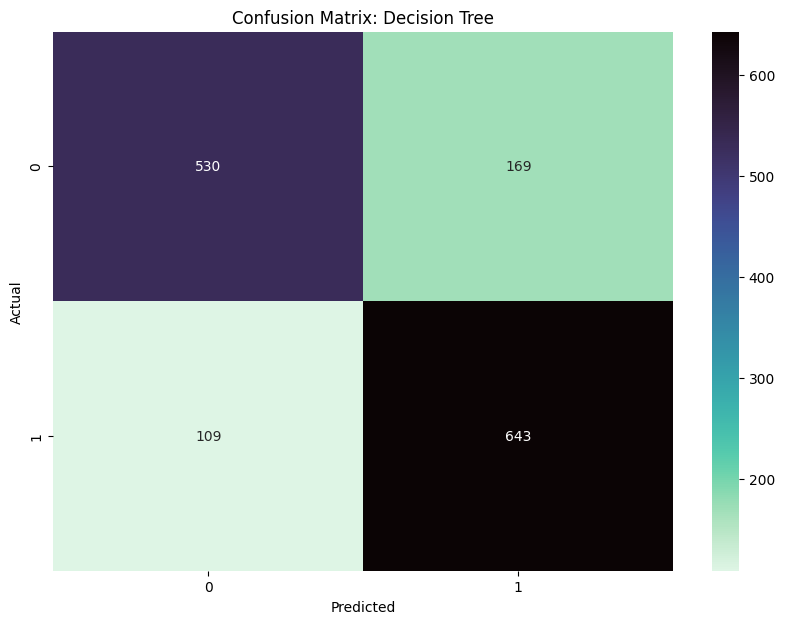

In [31]:
conf_matrix = confusion_matrix(y_test, prediction)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="mako_r")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Decision Tree')
plt.show()


**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [32]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

- Run Grid Search

In [33]:
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_norm, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
prediction_gs = best_model.predict(x_test_norm)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


- Evaluate your model

Accuracy: 0.80
Confusion Matrix:
[[520 179]
 [112 640]]
Classification Report:
                 precision    recall  f1-score   support

not transported       0.82      0.74      0.78       699
    transported       0.78      0.85      0.81       752

       accuracy                           0.80      1451
      macro avg       0.80      0.80      0.80      1451
   weighted avg       0.80      0.80      0.80      1451



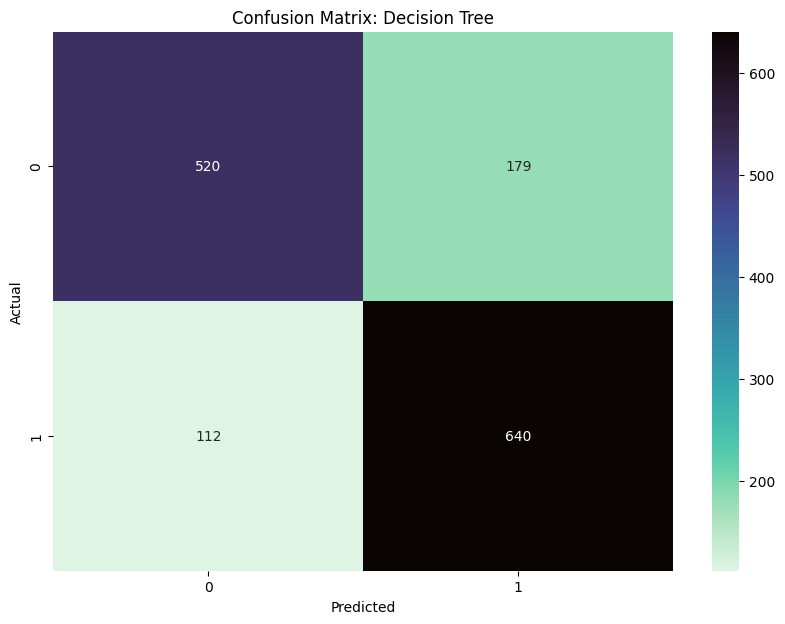

In [35]:
accuracy = accuracy_score(y_test, prediction_gs)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, prediction_gs)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, prediction_gs, target_names=['not transported', 'transported'])
print("Classification Report:")
print(class_report)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="mako_r")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Decision Tree')
plt.show()